# Captstone Project 2

#### Required Libraries
like numpy and pandas has been imported

In [1]:
import numpy as np # library to handle data in a vectorized manner

import urllib.request
import time

from urllib.request import urlopen

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 4.8MB/s eta 0:00:01     |███▏                            | 552kB 4.8MB/s eta 0:00:02     |█████                           | 849kB 4.8MB/s eta 0:00:01     |██████▉                         | 1.2MB 4.8MB/s eta 0:00:01     |█████████▎                      | 1.6MB 4.8MB/s eta 0:00:01     |███████████▍                    | 2.0MB 4.8MB/s eta 0:00:01     |█████████████▌                  | 2.3MB 4.8MB/s eta 0:00:01     |███████████████▉                | 2.7MB 4.8MB/s eta 0:00:01     |█████████████████████▋          | 3.7MB 4.8MB/s eta 0:00:01     |██████████████████████████      | 4.5MB 4.8MB/s eta 0:00:01     |█████████████████████████████   | 5.0MB 4.8MB/s eta 0:00:01     |███████████████████████████████▎| 5.4MB 4.8MB/s eta 0:00:01     |████████████████████████████████| 5.5MB 973kB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 1.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup

In [9]:
#requests.get(url).text will ping a website and return you HTML of the website.
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

soup = BeautifulSoup(page.text, 'lxml')
#soup.prettify()

In [10]:
postalCode_table = soup.find(class_='wikitable sortable')
#postalCode_table
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [11]:
dt = []
col = []

for index, tr in enumerate(postalCode_table.findAll('tr')):
    sec = []
    for td in tr.findAll(['th','td']):
        sec.append(td.text.rstrip())
        if (index == 0 ):
            col = sec
        else:
            dt.append(sec)

toronto_df = pd.DataFrame(data = dt, columns = col)
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
toronto_df.head(20).drop_duplicates().reset_index(drop=True)



,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"


In [12]:
lat_long_dt = pd.read_csv("http://cocl.us/Geospatial_data")
toronto_df = toronto_df.merge(lat_long_dt)
toronto_df = toronto_df.drop_duplicates().reset_index(drop=True)
toronto_df = toronto_df.drop('Postal Code',1)
toronto_df.head()

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [13]:
toronto_df.shape

(103, 4)

So there are a total of 103 postal codes in Toronto. 

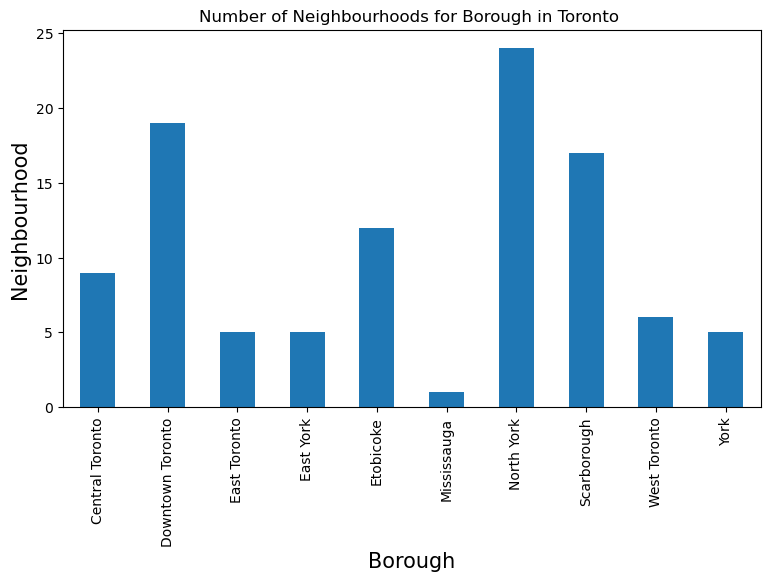

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighbourhoods for Borough in Toronto ')
# x-axis
plt.xlabel('Borough', fontsize = 15)
# y-axis
plt.ylabel('Neighbourhood', fontsize=15)
#setting a bar plot
toronto_df.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#result
plt.show()

In this case, North York has the highest number of neighbourhoods.

In [15]:
pip install geocoder

     |████████████████████████████████| 102kB 4.8MB/s ta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize




#### Geographical Data of Toronto
thus, geolocator has been applied to find out the latitude and longitude of toronto

In [17]:
address ='Toronto, Ontario'
# get geo location of address
geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [19]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

Folium installed


### Define Foursquare and Credentials

In [20]:
CLIENT_ID = '****************************' # your Foursquare ID
CLIENT_SECRET = '********************************' # your Foursquare Secret
ACCESS_TOKEN = '************************' # your FourSquare Access Token
VERSION = '20180605'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
    
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O
CLIENT_SECRET:44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA


#### Let's explore the first neighbourhood in our dataframe

Get the first neighbourhood's name: 

In [22]:
toronto_df.loc[0, 'Neighbourhood']

'Parkwoods'

#### Explore the neighbourhoods in Toronto

Let's create a function to repeat the same process to all the neighborhoods in Toronto.


In [26]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
new_df = toronto_df
new_df.head()

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


##### Create a new dataframe named: to_ve

In [28]:
#find the venues in Toronto
to_ve = getNearbyVenues(names=new_df['Neighbourhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

##### Check the resulting dataframe: 

In [29]:
print(to_ve.shape)
to_ve.head()

(8587, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
2,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
3,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket
4,Parkwoods,43.753259,-79.329656,Graydon Hall Manor,43.763923,-79.342961,Event Space


##### Check how many venues were returned for each neighbourhood

In [30]:
to_ve.groupby('Neighbourhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,100,100,100,100,100,100
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Wilson Heights, Downsview North",54,54,54,54,54,54
Bayview Village,52,52,52,52,52,52
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",48,48,48,48,48,48
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100


In [118]:
#choose the restaurant's keyword from venue categories
print('Restaurant keywords from venue categories: ')
list(to_ve['Venue Category'].unique())

Restaurant keywords from venue categories: 


['Caribbean Restaurant',
 'Café',
 'Golf Course',
 'Supermarket',
 'Event Space',
 'Middle Eastern Restaurant',
 'Liquor Store',
 'Park',
 'Seafood Restaurant',
 'Mediterranean Restaurant',
 'Gym / Fitness Center',
 'Japanese Restaurant',
 'Gym',
 'Grocery Store',
 'American Restaurant',
 'Fried Chicken Joint',
 'Pool Hall',
 'Ice Cream Shop',
 'Steakhouse',
 'Burger Joint',
 'Discount Store',
 'Fish & Chips Shop',
 'Pizza Place',
 'Fast Food Restaurant',
 'Salad Place',
 'Persian Restaurant',
 'Italian Restaurant',
 'Chinese Restaurant',
 'Pharmacy',
 'Filipino Restaurant',
 'Coffee Shop',
 'Paper / Office Supplies Store',
 'Beer Store',
 'Thai Restaurant',
 'Hotel',
 'Sandwich Place',
 'Hakka Restaurant',
 'Gas Station',
 'Bar',
 'Bank',
 'Asian Restaurant',
 'Wings Joint',
 'Automotive Shop',
 'Breakfast Spot',
 'Furniture / Home Store',
 'Diner',
 'Greek Restaurant',
 'Sushi Restaurant',
 'Bowling Alley',
 'Spa',
 'Construction & Landscaping',
 'Vietnamese Restaurant',
 'Shopping M

In [34]:
#initialize the related Chinese restaurants from the venue categories
chinese_restaurant = [ 'Chinese Restaurant', 'Dim Sum Restaurant',
             'Noodle House', 'Hakka Restaurant',  'Taiwanese Restaurant',  
             'Dumpling Restaurant','Asian Reataurant','Hong Kong Restaurant', 
             'Hotpot Restaurant','Xinjiang Restaurant',
             'Szechuan Restaurant'
             ]

chinese_pd = pd.DataFrame(chinese_restaurant)
#rename the coloumns
chinese_pd = chinese_pd.rename(columns={0:'Venue Category'})

#Join the 2 dataframes as instructed
new_df = pd.merge(to_ve, chinese_pd, on='Venue Category', how='right')

# show the new dataframe
new_df.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,15,15,15,15,15,15
"Bathurst Manor, Wilson Heights, Downsview North",1,1,1,1,1,1
Bayview Village,7,7,7,7,7,7
"Bedford Park, Lawrence Manor East",1,1,1,1,1,1
Berczy Park,1,1,1,1,1,1
Caledonia-Fairbanks,1,1,1,1,1,1
Canada Post Gateway Processing Centre,1,1,1,1,1,1
Cedarbrae,3,3,3,3,3,3
"Clarks Corners, Tam O'Shanter, Sullivan",7,7,7,7,7,7


### Analyze Each Neighbourhood

In [40]:
# one hot encoding
TO_onehot = pd.get_dummies(new_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TO_onehot['Neighbourhood'] = new_df['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [TO_onehot.columns[-1]] + list(TO_onehot.columns[:-1])
TO_onehot = TO_onehot[fixed_columns]

TO_onehot.head()

,Neighbourhood,Asian Reataurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Noodle House,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,Parkwoods,0,1,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,1,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,1,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,1,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,1,0,0,0,0,0,0,0,0,0


And, examine the new dataframe size

In [43]:
TO_onehot.shape

(136, 12)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [44]:
grouped_dt = TO_onehot.groupby('Neighbourhood').mean().reset_index()
grouped_dt.head()

,Neighbourhood,Asian Reataurant,Chinese Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Hakka Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Noodle House,Szechuan Restaurant,Taiwanese Restaurant,Xinjiang Restaurant
0,Agincourt,0.0,0.800000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.000000,0.000000,0.0
1,"Bathurst Manor, Wilson Heights, Downsview North",0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Bayview Village,0.0,0.714286,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.142857,0.0
3,"Bedford Park, Lawrence Manor East",0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,Berczy Park,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Let's confirm the new dataframe size

In [37]:
grouped_dt.shape

(46, 12)

#### Let's print each neighborhood along with the top 5 most common venues which related to Chinese cuisine

In [45]:
num_top_venues = 5

for hood in grouped_dt['Neighbourhood']:
    print("----"+hood+"----")
    temp = grouped_dt[grouped_dt['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.80
1    Dim Sum Restaurant  0.07
2  Hong Kong Restaurant  0.07
3          Noodle House  0.07
4      Asian Reataurant  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpling Restaurant   0.0
4     Hakka Restaurant   0.0


----Bayview Village----
                  venue  freq
0    Chinese Restaurant  0.71
1   Szechuan Restaurant  0.14
2  Taiwanese Restaurant  0.14
3      Asian Reataurant  0.00
4    Dim Sum Restaurant  0.00


----Bedford Park, Lawrence Manor East----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpling Restaurant   0.0
4     Hakka Restaurant   0.0


----Berczy Park----
                 venue  freq
0   Chinese Restaurant   1.0
1     Asian Reataurant   0.0
2   Dim Sum Restaurant   0.0
3  Dumpl

### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighbourhood.

In [49]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = grouped_dt['Neighbourhood']

for ind in np.arange(grouped_dt.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_dt.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(46, 6)

### Cluster neighbourhood

Run _k_-means to cluster the neighborhood into 5 clusters.

In [132]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = grouped_dt.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [133]:
To_labels = pd.merge(new_df,grouped_dt, on='Neighbourhood', how='right')
To_labels.shape

To_labels = To_labels.drop(columns=['Chinese Restaurant', 'Dim Sum Restaurant',
             'Noodle House', 'Hakka Restaurant',  'Taiwanese Restaurant',  
             'Dumpling Restaurant','Asian Reataurant','Hong Kong Restaurant', 
             'Hotpot Restaurant','Xinjiang Restaurant',
             'Szechuan Restaurant'
             ])
To_labels.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.7942,-79.262029,Grandeur Palace 華丽宮 (Grandeur Palace 華麗宮),43.797885,-79.270585,Chinese Restaurant
1,Agincourt,43.7942,-79.262029,Asian Legend 味香村,43.788068,-79.266768,Chinese Restaurant
2,Agincourt,43.7942,-79.262029,Congee Me 小米粥鋪,43.787392,-79.268387,Chinese Restaurant
3,Agincourt,43.7942,-79.262029,Fairview Seafood Chinese Cuisine,43.792907,-79.239348,Chinese Restaurant
4,Agincourt,43.7942,-79.262029,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [159]:
# add clustering labels

#neighborhoods_venues_sorted.insert(x, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

# merge grouped_dt with manhattan_data to add latitude/longitude for each neighbourhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood').dropna()
#toronto_merged['Cluster Labels'].astype(int)
#toronto_merged.dropna()# check the last columns!
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,1,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
1,North York,Victoria Village,43.725882,-79.315572,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
6,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
7,North York,Don Mills,43.745906,-79.352188,4,Dim Sum Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
13,North York,Don Mills,43.725900,-79.340923,4,Dim Sum Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
16,York,Humewood-Cedarvale,43.693781,-79.428191,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
17,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
20,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House


#### Let's visualize the resulting clusters

In [162]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        #color='green',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### The First Cluster 

In [171]:
to_clus1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
to_clus1.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Victoria Village,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
2,"Regent Park, Harbourfront",Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
3,"Lawrence Manor, Lawrence Heights",Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
6,"Malvern, Rouge",Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
16,Humewood-Cedarvale,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House


In [173]:
to_clus1.shape

(33, 6)

There are 33 boroughs under the first cluster.

### Second Cluster

In [174]:
to_clus2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
to_clus2.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Parkwoods,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
22,Woburn,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
26,Cedarbrae,Xinjiang Restaurant,Hakka Restaurant,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant
27,Hillcrest Village,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Noodle House
39,Bayview Village,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Noodle House


In [175]:
to_clus2.shape

(11, 6)

There are 11 boroughs under the second cluster.

### Third Cluster

In [176]:
to_clus3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
to_clus3.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
96,"St. James Town, Cabbagetown",Taiwanese Restaurant,Xinjiang Restaurant,Szechuan Restaurant,Noodle House,Hotpot Restaurant


In [182]:
to_clus3.shape

(1, 6)

There are only one under the third cluster. 

### Fourth Cluster

In [178]:
to_clus4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
to_clus4.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
32,Scarborough Village,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House,Hotpot Restaurant


In [179]:
to_clus4.shape

(1, 6)

There are only one neighbourhood under this cluster.

### Fifth Cluster

In [180]:
to_clus5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
to_clus5.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Don Mills,Dim Sum Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
13,Don Mills,Dim Sum Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
45,"York Mills, Silver Hills",Chinese Restaurant,Dim Sum Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
49,"North Park, Maple Leaf Park, Upwood Park",Dim Sum Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant


In [181]:
to_clus5.shape

(4, 6)

In [214]:
toronto_merged1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2, 3] + list(range(5, toronto_merged.shape[1]))]]
toronto_merged1.head()

,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,43.725882,-79.315572,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
2,43.654260,-79.360636,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
3,43.718518,-79.464763,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
6,43.806686,-79.194353,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House
16,43.693781,-79.428191,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Noodle House


In [69]:
toronto_merged2 =toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2,3] + list(range(5, toronto_merged.shape[1]))]]
toronto_merged2

,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,43.753259,-79.329656,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
22,43.770992,-79.216917,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
26,43.773136,-79.239476,Xinjiang Restaurant,Hakka Restaurant,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant
27,43.803762,-79.363452,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Noodle House
39,43.786947,-79.385975,Chinese Restaurant,Taiwanese Restaurant,Szechuan Restaurant,Xinjiang Restaurant,Noodle House
52,43.789053,-79.408493,Dumpling Restaurant,Chinese Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
65,43.757410,-79.273304,Chinese Restaurant,Noodle House,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
71,43.750072,-79.295849,Chinese Restaurant,Hakka Restaurant,Xinjiang Restaurant,Taiwanese Restaurant,Szechuan Restaurant
82,43.781638,-79.304302,Chinese Restaurant,Taiwanese Restaurant,Noodle House,Hotpot Restaurant,Hakka Restaurant
85,43.815252,-79.284577,Chinese Restaurant,Dumpling Restaurant,Noodle House,Hong Kong Restaurant,Dim Sum Restaurant


In [71]:
# Find the geographic center of the most dense or like cluster.
clus_coor = toronto_merged2[['Latitude', 'Longitude']]
clus_coor = list(clus_coor.values) 
lat = []
lng = []



for l in clus_coor:
  lat.append(l[0])
  lng.append(l[1])



lat = sum(lat)/len(lat)
lng = sum(lng)/len(lng)
print(lat)
print(lng)

43.78009501818182
-79.3109446


In [74]:
# Intstall opencage to reverse lookup the cooridinates
!pip install opencage
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

key = '******************'
geocoder = OpenCageGeocode(key)

results = geocoder.reverse_geocode(lat,lng)
pprint(results)

[{'annotations': {'DMS': {'lat': "43° 46' 48.17856'' N",
                          'lng': "79° 18' 39.46608'' W"},
                  'MGRS': '17TPJ3591748830',
                  'Maidenhead': 'FN03is27qf',
                  'Mercator': {'x': -8828855.992, 'y': 5401893.417},
                  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=75966659#map=16/43.78005/-79.31096',
                          'note_url': 'https://www.openstreetmap.org/note/new#map=16/43.78005/-79.31096&layers=N',
                          'url': 'https://www.openstreetmap.org/?mlat=43.78005&mlon=-79.31096#map=16/43.78005/-79.31096'},
                  'UN_M49': {'regions': {'AMERICAS': '019',
                                         'CA': '124',
                                         'NORTHERN_AMERICA': '021',
                                         'WORLD': '001'},
                             'statistical_groupings': ['MEDC']},
                  'callingcode': 1,
                  'currency': {

In [81]:
#requests.get(url).text will ping a website and return you HTML of the website.
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

soup = BeautifulSoup(page.text, 'lxml')
#soup.prettify()
dt = []
col = []

for index, tr in enumerate(postalCode_table.findAll('tr')):
    sec = []
    for td in tr.findAll(['th','td']):
        sec.append(td.text.rstrip())
        if (index == 0 ):
            col = sec
        else:
            dt.append(sec)

toronto_df2 = pd.DataFrame(data = dt, columns = col)
toronto_df2 = toronto_df2[toronto_df2['Borough'] != 'Not assigned'].reset_index(drop=True)
toronto_df2.head(20).drop_duplicates().reset_index(drop=True)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"


In [86]:
#to get the best location for a chinese restaurant
bestLoc = toronto_df2[toronto_df2['Postal Code'].str.contains('M1T')]

def str_join(*args):
    return ''.join(map(str, args))

bestFinalLoc = str_join('The Best Neighbourhood to have a Chinese cuisine restaurant is in: ', bestLoc['Neighbourhood'].values,  ' in ' ,  bestLoc['Borough'].values)


print(bestFinalLoc)

The Best Neighbourhood to have a Chinese cuisine restaurant is in: ["Clarks Corners, Tam O'Shanter, Sullivan"
 "Clarks Corners, Tam O'Shanter, Sullivan"
 "Clarks Corners, Tam O'Shanter, Sullivan"] in ['Scarborough' 'Scarborough' 'Scarborough']


In [103]:
 print('The perfect location to have a Chinese cuisine related restaurant is: 36 Forestbrook Crescent, Toronto, ON M1T 1P7, Canada.')

The perfect location to have a Chinese cuisine related restaurant is: 36 Forestbrook Crescent, Toronto, ON M1T 1P7, Canada.


In [213]:
# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
folium.Marker([43.78009501818182, -79.3109446], popup="<i>The best place to have a Chinese cuisine restaurant</i>"
).add_to(map_clusters)

map_clusters